## 3 story points ##
## 2 types of charts ##

### Legible ###
- put trial& error codes aside 
- Adjust/ truncate/ omit long output

### Check ###
- Notebook can executed by the readers and get the same results.
- All auxiliary files are stored in the assignment folder, including data, image, codes, ...
- The .ipynb notebook file should be self-explaining.Use https://nbviewer.jupyter.org to view it.

In [ ]:
import pandas
df=pandas.read_csv("Iloveapnews.csv",encoding='gb18030')
df

## Tags ##

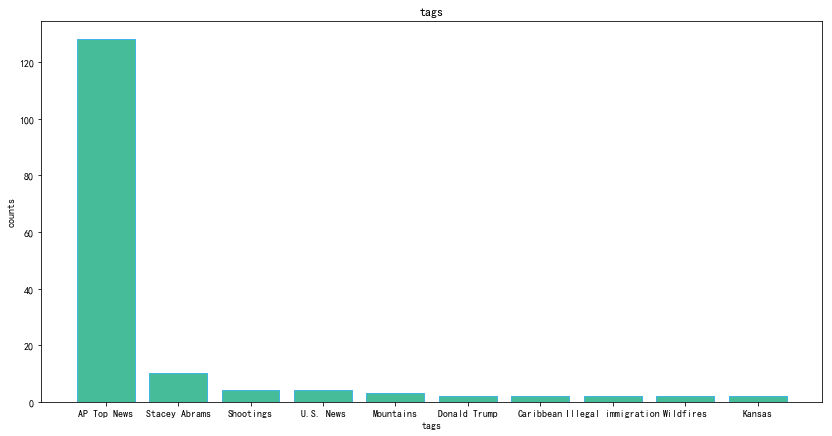

In [66]:
# -*- encoding='gb18030' -*-
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('Iloveapnews.csv',encoding='gb18030') 

plt.rcParams['axes.unicode_minus']=False #set for displaying `-`

tags_counts=df['tags'].value_counts()[:10].sort_values(ascending=False) #sort values
tags = pd.DataFrame(tags_counts)
fig = plt.figure(figsize=(14,7)) #adjust size
plt.bar(tags.index, tags.tags,color = '#46bc99',edgecolor = '#40b4e5') #change color of the bars

plt.title('tags') #plot title and label name
plt.xlabel('tags')
plt.ylabel('counts')
plt.show()

Analyze:From the graph, we can get some main topics AP reported in the early days of November, such as: midterm ( becasue Stacey Abram is a democrat who lost in elections) and illegal immigrations. Also, except news related to politics, AP also put much energy on covering wildlife and some tourists spots such as Carribben and mountains. Entertainment is also one aspect of news values.

## Bylines ##

In [ ]:
import csv
with open('Iloveapnews.csv','r') as f: # open CSV
    reader = csv.reader(f) # read CSV
    column = [row[3] for row in reader]
print(column)
#从csv中读取单列 Reference:https://blog.csdn.net/hengwen1991/article/details/52291119#

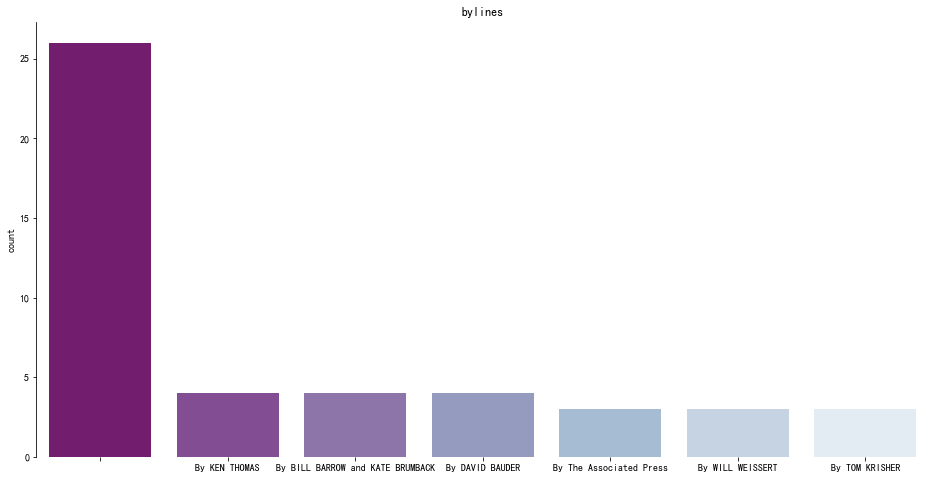

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt 
def word_count(column):
    word_count = pd.Series(column).value_counts().sort_values(ascending=False)[0:7]  
    fig = plt.figure(figsize=(16,8))  
    x = word_count.index.tolist()  
    y = word_count.values.tolist()  
    sns.barplot(x, y, palette="BuPu_r")  
    plt.title('bylines')  
    plt.ylabel('count')  
    sns.despine(bottom=True)  
    #plt.savefig('./word_count_bar.png',dpi=400)  
    plt.show()

word_count(column)

Analyze: We can know one of the most hard-working author in AP is Ken Thomas from this graph, and many articles do not have bylines, this is because AP use a byline only if the reporter was in the datelined community to gather the information reported.And we also found some articles used a double byline: by Bill Barrow and Kate Brumback. In this case, at least one of the byline reporters must have reported in the datelined community.

## Words in  headlines ##

In [ ]:
import csv
with open('Iloveapnews.csv','r') as f: # open CSV
    reader = csv.reader(f) # read CSV
    column2 = [row[1] for row in reader]
print(column2)

#这一步是用读csv的方法得出title的List#

In [70]:
f=open("title.txt","w")
for z in range(len(column2)):
    f.write(column2[z])
f.close()
#这一步是写入一个title的txt文件#

In [71]:
#以下代码主要参考自week 10 notes#
import os
import pandas as pd

In [72]:
def read_txt(path):
    for i in '\s+\.\!\/_,$%^*(+\"\')]+|[+——()?:【】“”‘’！，。’':#把那些乱七八糟的符号都去掉）
            titlewords = [item.replace(i," ") for item in column2] #本来遇到了'list' object has no attribute 'replace'的错误，但在stackoverflow上找到了解决办法kickoff = [item.replace("'", "") for item in kickoff]#
    return titlewords

In [73]:
def stopwordslist(filepath):   #set stopwords
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='gb18030').readlines()]  
    return stopwords

In [74]:
def remove_stopwords(titlewords): #remove stopwords
    processed_word_list = [] 
    for word in titlewords:
        word = word.lower() # in case they are not all lower cased
        if word not in stopwords:
            processed_word_list.append(word)
    return processed_word_list

In [ ]:
titlewords #得到比较干净的title的文档#

In [76]:
titlewords = read_txt(r"C:\Users\xuwen\venv\test\Scripts\assignment2")#这个path弄了半天。路径最后必须要是文件夹吗？还有我的电脑上为啥前面必须加个r，做assignment0的时候也是
#titlewords = titlewords.split()#
stopwords = stopwordslist('title.txt')
stopwords = set(stopwords)

processed_word_list = remove_stopwords(titlewords)
word_count = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[0:15]

In [ ]:
!pip install Pillow
#就是为了下面from PIL#
!pip install wordcloud

In [78]:
from PIL import Image
import wordcloud
import numpy as np

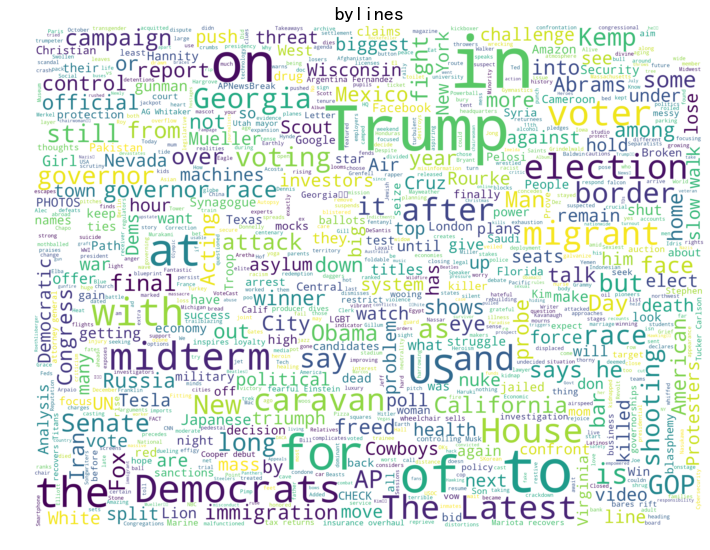

In [79]:
def tag_cloud(text):
    mask = np.array(Image.open('newspaper.jpg')) 
    
    #我的这个照片只能放在Scripts文件夹下，却不能放在里面的assignment2文件夹下？？？#
    wc = wordcloud.WordCloud(mode='RGBA',background_color='white',max_words=2000,stopwords=stopwords,max_font_size=300,random_state=42,mask=mask)
    wc.generate_from_text(' '.join(text))
    plt.figure(figsize=(12,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('bylines', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

tag_cloud(titlewords)

Analyze: In the early days of November, the AP news was focusing on the midterm of United States. and I found the AP news mentioned Fox, which is a news organisation supporting the republican president Trump, and AP topnews said many things about Democrats and Obama. to some extent, its shows the AP topnews wrote two sides and this is consistent with its "objectivity" guideline.